In [8]:
import sys
sys.path.append('/home/batman/PycharmProjects/tensorflow-wavenet/')
import preprocess
import imp
import h5py
imp.reload(preprocess)

from IPython.display import Audio
import matplotlib.pyplot as plt

In [12]:
h5f = h5py.File('../musicnet_freq/musicnet_extracted.h5','r')
var = h5f["normalize/var"].value
mean = h5f["normalize/mean"].value

h5f_coeff = h5py.File('../musicnet_freq/musicnet_freq_generated_random.h5', 'r')

coeff = h5f_coeff["generated"].value
h5f_coeff.close()

coeff *= var
coeff += mean

#plt.plot(coeff_true[:2000].sum(axis=1), label='true')
#plt.plot(coeff[:2000].sum(axis=1), label='generated')
#loss = np.square(coeff_true[:1500]-coeff[:1500]).sum(axis=-1)
#plt.plot(loss)
#plt.legend()
#print(loss.mean())
print coeff.shape
audio = preprocess.load_freq(coeff.flatten())
Audio(audio, rate=44100)

(10001, 300)


In [6]:
#Save results as .h5 in a file 
output_file_location = '../musicnet_freq/musicnet_generated_audio.h5'
output_file = h5py.File(output_file_location, 'w')
output_file.create_dataset('generated', data=audio)
output_file.close()
print "generated audio saved in file "+ output_file_location

generated audio saved in file ../musicnet/musicnet_generated_audio.h5


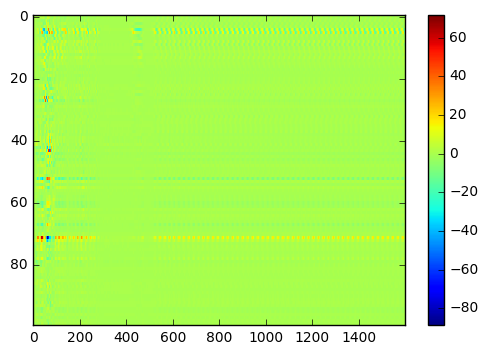

In [7]:
plt.imshow(coeff[:1600].T, aspect='auto', interpolation='none')
plt.colorbar()
plt.show()
